<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [3]:
def to_sparce(X):
    indices = X.reshape(-1)
    data = np.ones_like(indices)
    indptr = [i * X.shape[1] for i in range(X.shape[0]+1)]
    return csr_matrix((data, indices, indptr), dtype=int)[:, 1:]

In [4]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    '''
    предобработка данных
    на вход получаем :
    - путь к папке с файлами
    - путь к частотному словарю сохраненному в формате pickle
        формат словаря
            site_str : (site_id, site_freq)
    - длинну сессии и размер окна
    
    Промежуточный результат - DataFrame
        id_session, site_1 .... site_session_length, id_user
        site_i - site_id of site in i column
    
    на выход выдаем 
    X_sparce - данные (DataFrame)преобразованные к разряженному виду
    y - вектор с ответами
        
    '''
    # получим список с именами и путями к файлам и отсортируем его
    f_names = glob(path_to_csv_files+'/*.csv')
    f_names.sort()

    # восстановим частотный словарь из picklie
    with open(site_freq_path, 'rb') as site_freq_pkl:
        dict_freq = pickle.load(site_freq_pkl)


    # создадим пустой список в который будем добавлять данные по сесиям
    list_of_sessions = []

    # проходим повторным циклом по всем файлам что-бы заполнить данные о сессиях в DataFrame
    for f_name in f_names:
        user_id = int(f_name[-8:-4]) # из названия файла выделим user_id
        user_sessions = pd.read_csv(f_name) # считаем данные по пользователю в DataFrame
        file_len = user_sessions.shape[0]
        user_sessions_num  = file_len // window_size + (file_len % window_size > 0 ) # определим общее количество сессий у пользователя
        # и пройдемся по всем сессиям пользователя циклом  
        for i in range(user_sessions_num):
            session_id = i+1 # сохраним id сессии
            # сделаем срез по одной сессии и добавим её в DataFrame
            one_user_sess = user_sessions.iloc[i*window_size:min(i*window_size + session_length, user_sessions.shape[0]), 1]
            #сохраним данные по сессии в общий список
            sites_id_list = [dict_freq[site][0] for site in  one_user_sess]
            # если это последняя сессия и количество записей меньше чем указанная длинна добьем нулями
            while len(sites_id_list) < session_length:
                sites_id_list+=[0]

            list_of_sessions.append([session_id] + sites_id_list + [user_id] )

    # на основании списка создалим DataFrame
    columns = ['session_id'] + ['site' + str(i+1) for i in range(session_length)] + ['user_id']
    Sessions = pd.DataFrame(list_of_sessions, columns=columns) 
    X_sparce = to_sparce(Sessions.iloc[:, 1:-1].values)
    y = Sessions.iloc[:, -1].values
    return X_sparce, y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [5]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

In [6]:
X_toy_s5_w3.todense()

matrix([[0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0],
        [3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [7]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3], dtype=int64)

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [8]:
X_sparse.shape[0]

NameError: name 'X_sparse' is not defined

In [95]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            
            X_sparce_file_name = 'X_sparse_' + str(num_users)+ 'u_' + str(session_length) + 's_' \
                                                            + str(window_size) + 'w' + '.pkl'
            y_file_name = 'y_' + str(num_users)+ 'u_' + str(session_length) + 's_' \
                                                            + str(window_size) + 'w' + '.pkl'
            
            print(X_sparce_file_name, y_file_name)
            
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA, str(num_users)+'users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_'+str(num_users)+'users.pkl'),
                                       session_length=session_length, window_size=window_size)
            with open(os.path.join(PATH_TO_DATA, X_sparce_file_name), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, y_file_name), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)
            data_lengths.append(X_sparse.shape[0])

X_sparse_10u_15s_10w.pkl y_10u_15s_10w.pkl
X_sparse_10u_15s_7w.pkl y_10u_15s_7w.pkl
X_sparse_10u_10s_7w.pkl y_10u_10s_7w.pkl
X_sparse_10u_7s_7w.pkl y_10u_7s_7w.pkl
X_sparse_10u_15s_5w.pkl y_10u_15s_5w.pkl
X_sparse_10u_10s_5w.pkl y_10u_10s_5w.pkl
X_sparse_10u_7s_5w.pkl y_10u_7s_5w.pkl
X_sparse_10u_5s_5w.pkl y_10u_5s_5w.pkl
X_sparse_150u_15s_10w.pkl y_150u_15s_10w.pkl
X_sparse_150u_15s_7w.pkl y_150u_15s_7w.pkl
X_sparse_150u_10s_7w.pkl y_150u_10s_7w.pkl
X_sparse_150u_7s_7w.pkl y_150u_7s_7w.pkl
X_sparse_150u_15s_5w.pkl y_150u_15s_5w.pkl
X_sparse_150u_10s_5w.pkl y_150u_10s_5w.pkl
X_sparse_150u_7s_5w.pkl y_150u_7s_5w.pkl
X_sparse_150u_5s_5w.pkl y_150u_5s_5w.pkl
Wall time: 7min 32s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [9]:
''' ВАШ КОД ЗДЕСЬ '''
for d in data_lengths:
    print(d, end = '')

NameError: name 'data_lengths' is not defined

In [10]:
len(set(data_lengths))

NameError: name 'data_lengths' is not defined

In [11]:
data_lengths

NameError: name 'data_lengths' is not defined

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [12]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [13]:
train_df[train_df['site10'] == 0]

,session_id.1,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,,
1781,1022,1154,1154,39,39,0,0,0,0,0,0,33
3985,2204,43,0,0,0,0,0,0,0,0,0,39
4787,802,80,4044,31,3,37,23,151,0,0,0,50
5507,720,23,23,37,23,23,23,23,23,0,0,100
7219,1712,1293,98,1293,477,843,585,1293,56,56,0,127
11883,1868,39,39,2128,2128,39,0,0,0,0,0,207
13526,1643,51,24,4,554,219,219,219,254,0,0,237
14060,534,10,21,0,0,0,0,0,0,0,0,241


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 12 columns):
session_id.1    14061 non-null int64
site1           14061 non-null int64
site2           14061 non-null int64
site3           14061 non-null int64
site4           14061 non-null int64
site5           14061 non-null int64
site6           14061 non-null int64
site7           14061 non-null int64
site8           14061 non-null int64
site9           14061 non-null int64
site10          14061 non-null int64
user_id         14061 non-null int64
dtypes: int64(12)
memory usage: 1.4 MB


**Распределение целевого класса:**

In [15]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [16]:
num_unique_sites = [np.unique(train_df.values[i, 1:-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [17]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

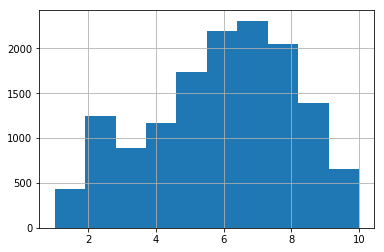

In [18]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

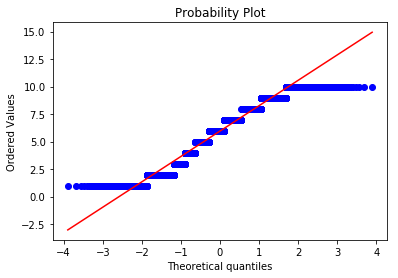

In [19]:
stats.probplot(pd.Series(num_unique_sites), dist="norm", plot=plt)
plt.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов нормально
 
 $H_1\colon$ не нормально.

In [20]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(pd.Series(num_unique_sites)))

C:\Users\Dima\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [21]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [24]:
stats.binom_test(has_two_similar.sum(), train_df.shape[0], 0.95, alternative = 'greater')

0.02207653769072678

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [25]:
wilson_interval = proportion_confint(has_two_similar.sum(), train_df.shape[0], method = 'wilson')

In [26]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [27]:
# считаем наш сохранненный частотный словарь для 10 пользователей
with open(PATH_TO_DATA + '/site_freq_10users.pkl', 'rb') as site_freq_pkl:
    dict_freq = pickle.load(site_freq_pkl)

# и выберем из него идентификаторы сайтов, посещенных более чем 1000 раз
# сохраним в DataFrame

site_freqs = pd.DataFrame( [dict_freq[x] for x in dict_freq ], columns=['site', 'freq'])

In [28]:
site_freqs.shape

(4913, 2)

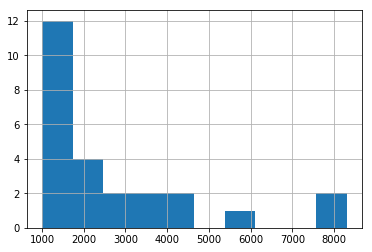

In [29]:
site_freqs[site_freqs.freq >= 1000].freq.hist()

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [30]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [31]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [34]:
mean_freq_boostrap = list(map(np.mean, get_bootstrap_samples(site_freqs.values[:, 1], 4913)))


In [39]:
interval = stat_intervals(mean_freq_boostrap, 0.05)
for i in interval:
    print(round(i,3), end=' ')

22.515 35.763 

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.